In [1]:
import numpy as np
import matplotlib.pyplot as plt
import reading

In [2]:
data_length = 4096 # d
timesteps = 2048
data_dim = data_length//timesteps # L
srate = 173.61

def reshape_signal(raw_signal):
    return reading.segment_data(raw_signal[0:data_length], timesteps, data_dim)

In [3]:
ubonn_data, ubonn_labels = reading.load_ubonn()
ubonn_data.shape

ead N-EYES67-.txt
Read N-EYES68-.txt
Read N-EYES69-.txt
Read N-EYES7-.txt
Read N-EYES70-.txt
Read N-EYES71-.txt
Read N-EYES72-.txt
Read N-EYES73-.txt
Read N-EYES74-.txt
Read N-EYES75-.txt
Read N-EYES76-.txt
Read N-EYES77-.txt
Read N-EYES78-.txt
Read N-EYES79-.txt
Read N-EYES8-.txt
Read N-EYES80-.txt
Read N-EYES81-.txt
Read N-EYES82-.txt
Read N-EYES83-.txt
Read N-EYES84-.txt
Read N-EYES85-.txt
Read N-EYES86-.txt
Read N-EYES87-.txt
Read N-EYES88-.txt
Read N-EYES89-.txt
Read N-EYES9-.txt
Read N-EYES90-.txt
Read N-EYES91-.txt
Read N-EYES92-.txt
Read N-EYES93-.txt
Read N-EYES94-.txt
Read N-EYES95-.txt
Read N-EYES96-.txt
Read N-EYES97-.txt
Read N-EYES98-.txt
Read N-EYES99-.txt
Read N-MUSC0-.txt
Read N-MUSC1-.txt
Read N-MUSC10-.txt
Read N-MUSC11-.txt
Read N-MUSC12-.txt
Read N-MUSC13-.txt
Read N-MUSC14-.txt
Read N-MUSC15-.txt
Read N-MUSC16-.txt
Read N-MUSC17-.txt
Read N-MUSC18-.txt
Read N-MUSC19-.txt
Read N-MUSC2-.txt
Read N-MUSC20-.txt
Read N-MUSC21-.txt
Read N-MUSC22-.txt
Read N-MUSC23-.txt


(2000, 4097)

In [4]:
def gaussian_noise(signal, strength = 1):
    noise = np.random.normal(0,1,len(signal)) * strength
    return signal + noise

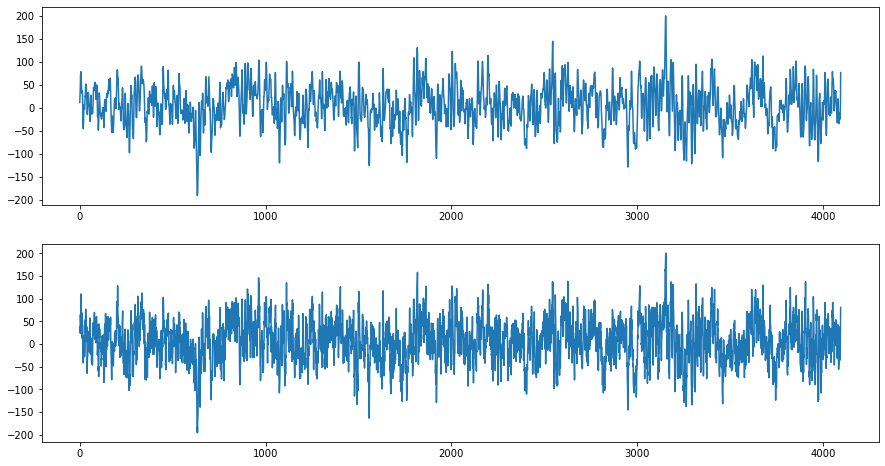

In [5]:
raw = ubonn_data[0]
noisy = gaussian_noise(ubonn_data[0], strength=20)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8))
ax1.plot(raw[:len(raw)])
ax2.plot(noisy[:len(raw)])


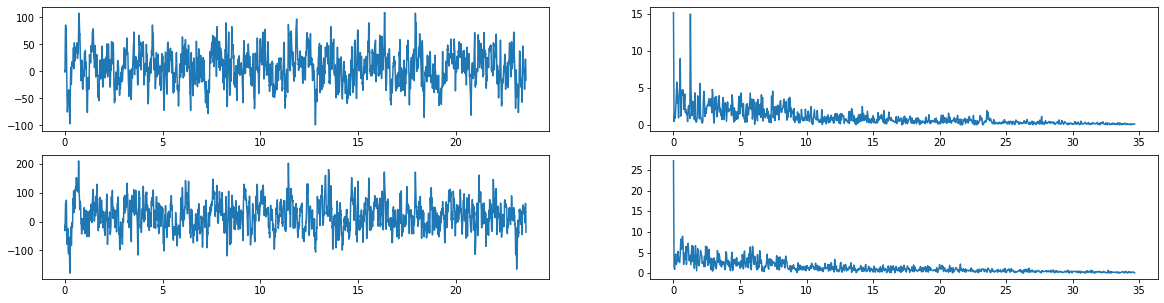

In [9]:
from scipy.signal import butter, lfilter, freqz, firwin
from scipy.fft import fft, fftfreq
eyes = 10
orig = eyes + 300
z_eyes_1 = ubonn_data[eyes]
z_normal = ubonn_data[orig]

original_fft = fft(z_eyes_1)
original_freqs = fftfreq(z_eyes_1.shape[0], 1/srate)

eyes_fft = fft(z_normal)
eyes_freqs = fftfreq(z_normal.shape[0], 1/srate)

t = np.linspace(0, data_length/srate, data_length + 1, endpoint=False)

fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 5))
ax11.plot(t, z_eyes_1, label='Raw signal')
ax12.plot(original_freqs[0:data_length//5], 2/data_length * np.abs(original_fft[0:data_length//5]))

ax21.plot(t, z_normal, label='Noisy signal')
ax22.plot(eyes_freqs[0:data_length//5], 2/data_length * np.abs(eyes_fft[0:data_length//5]))
ax1.grid(True)
ax2.grid(True)
plt.show()